In [ ]:
pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=ffeb27f89d83f82bea4b20a3ac1f8b54ba1dc4f245f157b6b0fb6fb3c221b559
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [14]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, normalized_mutual_info_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np

In [6]:
# import data
ng20 = fetch_20newsgroups(subset='all')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))


In [ ]:
def dim_red(mat, p):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list
        p : number of dimensions to keep
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''

    red_mat = mat[:,:p]

    return red_mat

In [3]:
import pandas as pd

In [12]:
ng20_df = pd.DataFrame({'Text': ng20, 'Category': [ng20.target_names[i] for i in ng20.target]})

ValueError: ignored

In [9]:
ng20_df

,Text,Category
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,rec.sport.hockey
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,comp.sys.ibm.pc.hardware
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,talk.politics.mideast
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,comp.sys.ibm.pc.hardware
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,comp.sys.mac.hardware
...,...,...
18841,From: jim.zisfein@factory.com (Jim Zisfein) \n...,sci.med
18842,From: rdell@cbnewsf.cb.att.com (richard.b.dell...,sci.electronics
18843,From: westes@netcom.com (Will Estes)\nSubject:...,comp.sys.ibm.pc.hardware
18844,From: steve@hcrlgw (Steven Collins)\nSubject: ...,comp.graphics


In [18]:
# import data
ng20 = fetch_20newsgroups(subset='train')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

In [20]:
ng20_df = pd.DataFrame({'Text': ng20.data, 'Category': ng20.target})

In [21]:
ng20_df['Category_Name'] = ng20_df['Category'].apply(lambda x: ng20.target_names[x])


In [22]:
ng20_df.head()

,Text,Category,Category_Name
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Supposons que vous avez déjà vectorisé vos données NG20 avec TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# embeddings = tfidf_vectorizer.fit_transform(ng20.data)

# Appliquer PCA
n_components = 84  # Définir le nombre de composantes principales souhaitées
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(embeddings)  # Pas besoin de toarray() ici

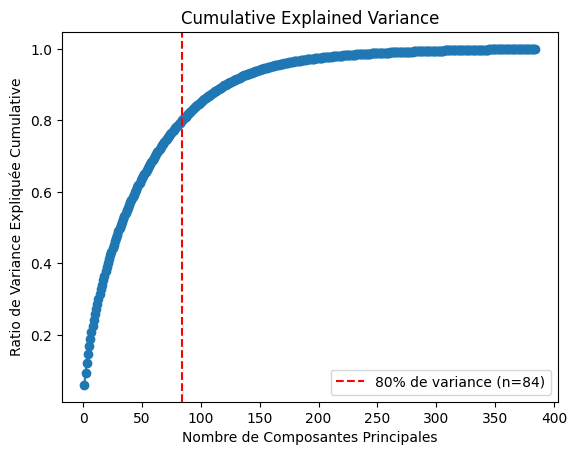

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Supposons que vous ayez déjà appliqué PCA et obtenu pca_result
pca = PCA()
pca_result = pca.fit_transform(embeddings)

# Calculer la variance cumulative expliquée
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Trouver le nombre de composantes pour atteindre 80% de variance expliquée
desired_variance_ratio = 0.8
num_components_for_desired_variance = next(
    i for i, var in enumerate(cumulative_explained_variance, 1) if var >= desired_variance_ratio
)

# Tracer le graphique de la variance cumulative expliquée
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.axvline(x=num_components_for_desired_variance, color='red', linestyle='--', label=f'80% de variance (n={num_components_for_desired_variance})')
plt.title('Cumulative Explained Variance')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Ratio de Variance Expliquée Cumulative')
plt.legend()
plt.show()


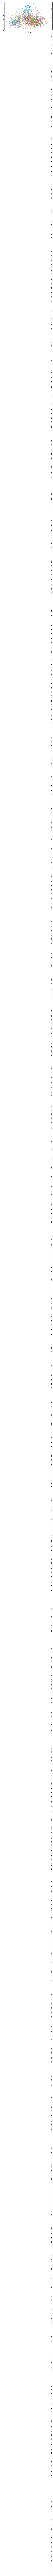

In [30]:
# Visualiser les résultats
plt.figure(figsize=(10, 6))
for i, label in enumerate(labels):
    plt.scatter(pca_result[labels == i, 0], pca_result[labels == i, 1], label=label , alpha=0.5)

plt.title('PCA on NG20 Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()



Variance Expliquée :
 [0.06012595 0.03423283 0.02624439 0.02541167 0.02269901 0.01983089
 0.01925131 0.01793491 0.01631761 0.01550462 0.01522028 0.01406395
 0.01397574 0.0138042  0.01316116 0.01284202 0.01264844 0.012393
 0.01214249 0.01172334 0.01124565 0.01103054 0.01078953 0.01021964
 0.00995902 0.00982296 0.00951017 0.00946677 0.00931594 0.00904562
 0.00896305 0.00861641 0.00840243 0.00827197 0.00807272 0.00794794
 0.00785278 0.00767398 0.00759307 0.0074094  0.00735331 0.00713959
 0.00707563 0.00696851 0.00690559 0.0068237  0.00659207 0.00648036
 0.00632547 0.00622991 0.00607134 0.00595191 0.00577478 0.00565211
 0.00564936 0.00557496 0.00548341 0.00540931 0.00534909 0.00530277
 0.00525704 0.00519109 0.00514759 0.00495067 0.00486336 0.00476772
 0.00473654 0.00467328 0.00455131 0.00444401 0.00440835 0.00432386
 0.00423774 0.00417506 0.0041192  0.00409596 0.00396038 0.00394695
 0.00381508 0.00376752 0.00368222 0.00366681 0.00358833 0.00351814]


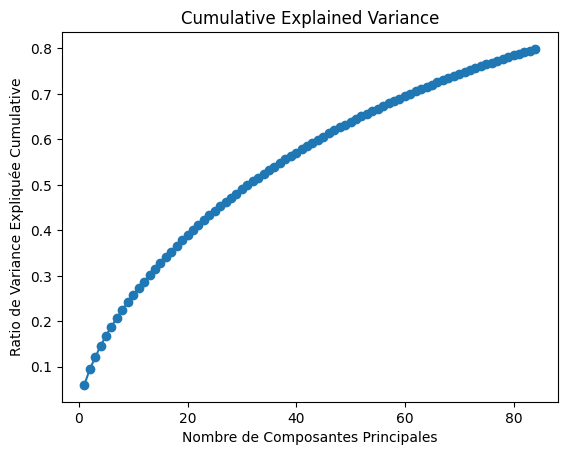

In [34]:
# 2. Variance Expliquée
explained_variance_ratio = pca.explained_variance_ratio_
print("\nVariance Expliquée :\n", explained_variance_ratio)

# 3. Choix du Nombre de Composantes Principales
cumulative_explained_variance = explained_variance_ratio.cumsum()
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Ratio de Variance Expliquée Cumulative')
plt.show()

In [ ]:
pca_result

In [43]:
from sklearn.cluster import KMeans

# Supposons que vous ayez déjà appliqué PCA et obtenu pca_result
# Supposons également que vous avez déterminé le nombre optimal de clusters (k)

# Appliquer K-Means
k = 20  # Remplacez par le nombre optimal de clusters que vous avez déterminé
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_result = kmeans.fit_predict(pca_result)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


IndexError: ignored

In [ ]:

# Ajouter les résultats du clustering au DataFrame (ng20_df)
pca_result['Cluster'] = kmeans_result

# Afficher les premières lignes du DataFrame avec les résultats du clustering
print(ng20_df.head())

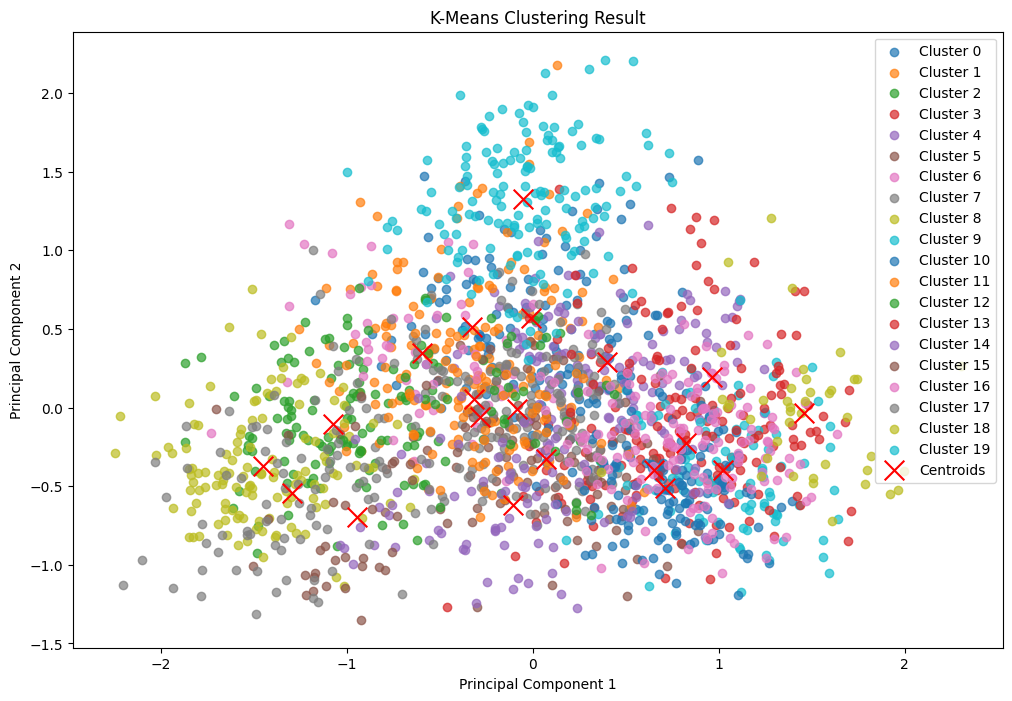

In [42]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.figure(figsize=(12, 8))

for cluster in range(k):  # 'k' is the number of clusters
    cluster_points = pca_result[kmeans_result == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.7)

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, color='red', label='Centroids')

plt.title('K-Means Clustering Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()